In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import tensorflow as tf


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data_tot = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data_tot.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

# Split the data into train and validation datasets
train_data, val_data = train_test_split(train_data_tot, test_size=0.2, random_state=1)

val_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived:", rate_women)

% of women who survived: 73.89558232931726


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.011759 -0.010021  0.032025 -0.011503  0.011449   
Survived        0.011759  1.000000 -0.356366 -0.071135 -0.020049  0.113039   
Pclass         -0.010021 -0.356366  1.000000 -0.368103  0.053573  0.007911   
Age             0.032025 -0.071135 -0.368103  1.000000 -0.279144 -0.191609   
SibSp          -0.011503 -0.020049  0.053573 -0.279144  1.000000  0.409839   
Parch           0.011449  0.113039  0.007911 -0.191609  0.409839  1.000000   
Fare            0.008187  0.269928 -0.590911  0.102786  0.193202  0.246875   
Sex_num        -0.048335  0.546254 -0.143866 -0.065091  0.128039  0.253238   

                 Fare   Sex_num  
PassengerId  0.008187 -0.048335  
Survived     0.269928  0.546254  
Pclass      -0.590911 -0.143866  
Age          0.102786 -0.065091  
SibSp        0.193202  0.128039  
Parch        0.246875  0.253238  
Fare         1.000000  0.199217  
Sex_num      0.199217  1.

/tmp/ipykernel_21/3911555809.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = subset.corr()


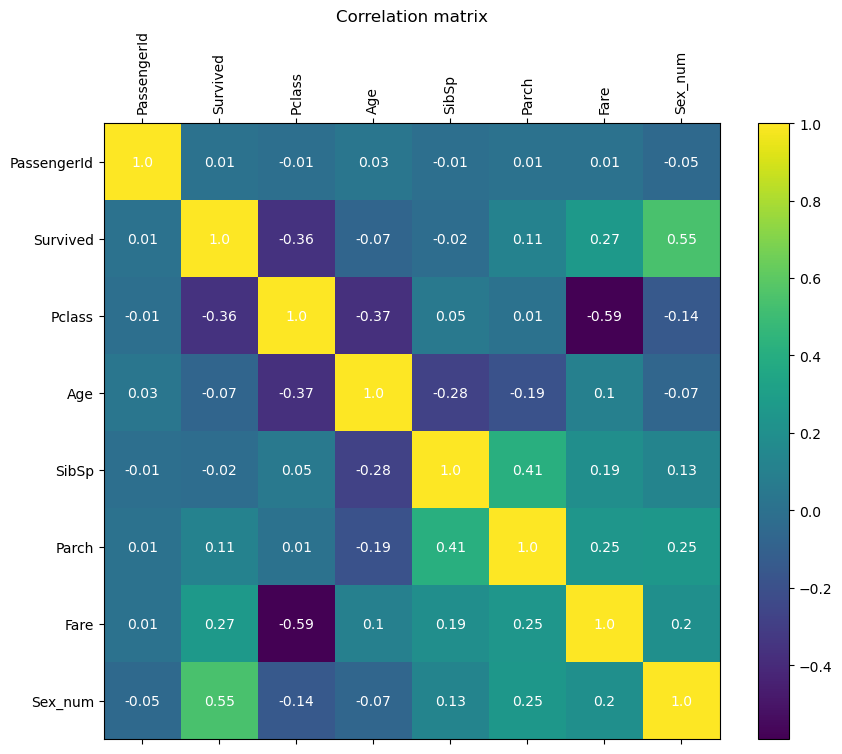

In [6]:
# Compute correlation to see what would be the relevant features

# correlation=train_data["Survived"].corr(train_data["SibSp"])

subset=train_data
subset['Sex_num']=subset['Sex'].apply(lambda x: 1 if x == 'female' else 0)
corr_matrix = subset.corr()

# print(correlation)
print(corr_matrix)
# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.matshow(corr_matrix)

# Add the values in the plot
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w")

# Add legend and title
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar(im)
plt.title("Correlation matrix")
plt.show()

There is a strong correlation between the target variable: 'Survived' and the variables 'Pclass', 'Parch', 'Fare' and the one corresponding to the sex. This is a first indication that these variables are likely to be relevant. However, the high correlation between the 'Parch' and 'Fare' variables may indicate that these two variables provide redundant information.

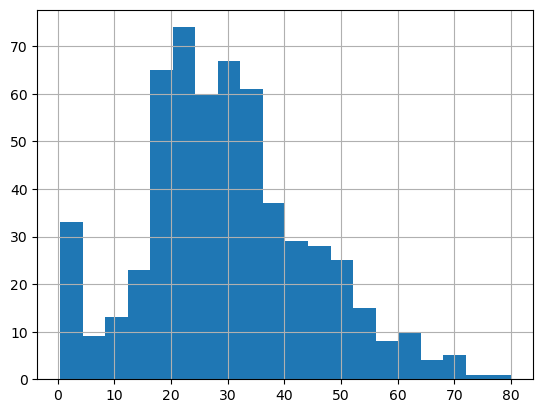

In [7]:
# Check the distribution of the variables
train_data['Age'].hist(bins=20);

**Use of a random forest classifier**

In [8]:
y_tot = train_data_tot["Survived"]

features = ["Pclass", "Sex", "Parch", "Fare"]
X_tot = pd.get_dummies(train_data_tot[features])

y = train_data["Survived"]

X = pd.get_dummies(train_data[features])

y_val = val_data["Survived"]
X_val = pd.get_dummies(val_data[features])

model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)
history = model.fit(X, y)


In [9]:
# Evaluate on the validation set
predictions = model.predict(X_val)

val_survived = val_data["Survived"]
score_val = sum(val_survived==predictions)/len(val_survived)*100

print("The rate of good predictions on the validation set is {}%:", score_val)

The rate of good predictions on the validation set is {}%: 81.56424581005587


[  6  11  13  15  25  30  35  38  40  44  48  54  63  64  65  67  68  74
  78  80 110 113 119 121 129 131 133 144 154 163 165 167 169]
% of women in the mispredictions compared to the validation set: 0.751048951048951
% of surviving people in the mispredictions compared to the validation set: 1.9319219593192196


Text(0.5, 1.0, 'Histogram of Age')

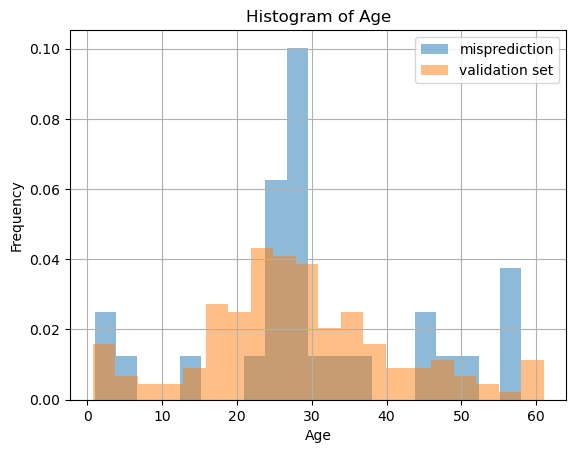

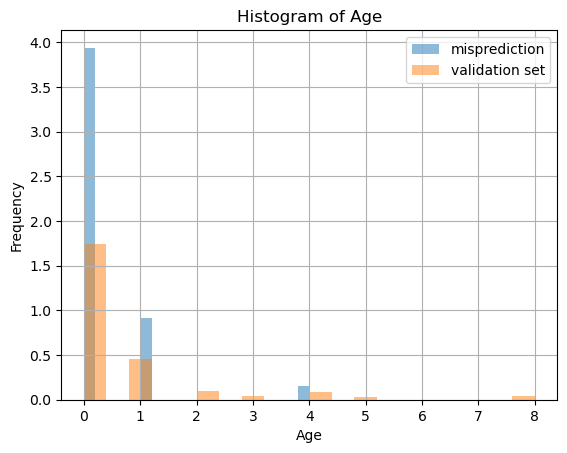

In [10]:
# Error analysis
mispredictions = np.where(predictions != val_survived)[0]
print(mispredictions)
val_data_mis=val_data.iloc[mispredictions]
#print(val_data_mis)

women_mis = val_data_mis["Sex"]=='female'
women = val_data["Sex"]=='female'
rate_women_mis = sum(women_mis)/len(women_mis)*len(women)/sum(women)

surv_mis = val_data_mis["Survived"]
surv = val_data["Survived"]
rate_surv_mis = sum(surv_mis)/len(surv_mis)*len(surv)/sum(surv)

print("% of women in the mispredictions compared to the validation set:", rate_women_mis)
print("% of surviving people in the mispredictions compared to the validation set:", rate_surv_mis)

val_data_mis['Age'].hist(bins=20, alpha=0.5, density=True, label='misprediction');
val_data['Age'].hist(bins=20, alpha=0.5, density=True, label='validation set');

# Add a legend to the plot
plt.legend()

# Add axis labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.figure()
val_data_mis['SibSp'].hist(bins=20, alpha=0.5, density=True, label='misprediction');
val_data['SibSp'].hist(bins=20, alpha=0.5, density=True, label='validation set');

# Add a legend to the plot
plt.legend()

# Add axis labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

We observe that surviving people are particularly mispredicted

(10, 5)


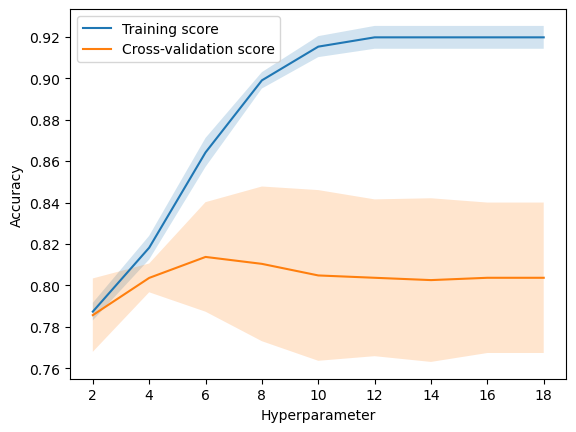

In [11]:
# Draw validation curve
# Define the parameter range for the number of trees
param_range = np.arange(0, 100, 5)
# Define the parameter range for the depth
param_range = np.arange(0, 20, 2)

# Calculate the training and validation scores for different numbers of trees
train_scores, val_scores = validation_curve(model, X_tot, y_tot, param_name="max_depth", param_range=param_range, cv=5)
print(train_scores.shape)
# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label="Training score")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, val_mean, label="Cross-validation score")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


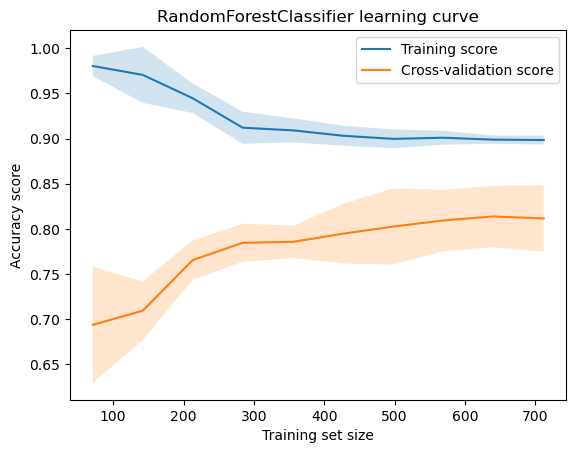

In [12]:
# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the training and validation scores for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(model, X_tot, y_tot, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label="Cross-validation score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("RandomForestClassifier learning curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc="best")
plt.show()


We observe some overfitting.



**Architecture SVM**

In [13]:
# Architecture SVM
# SVM with a Gaussian kernel
svm_model = SVC(kernel='rbf', C=0.8, gamma=0.6, random_state=1)

svm_model.fit(X, y)

SVC(C=0.8, gamma=0.6, random_state=1)

In [14]:
# Evaluate on the validation set
svm_predictions = svm_model.predict(X_val)

val_survived = val_data["Survived"]
svm_score_val = sum(val_survived==svm_predictions)/len(val_survived)*100

print("The rate of good predictions on the validation set is {}%:", svm_score_val)

The rate of good predictions on the validation set is {}%: 79.3296089385475


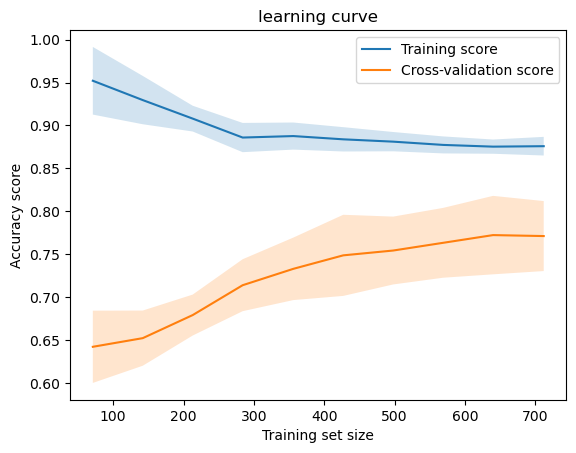

In [15]:
# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the training and validation scores for different training set sizes
train_sizes, train_scores, val_scores = learning_curve(svm_model, X_tot, y_tot, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label="Cross-validation score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("learning curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc="best")
plt.show()

Once again, we observe some overfitting

(50, 5)


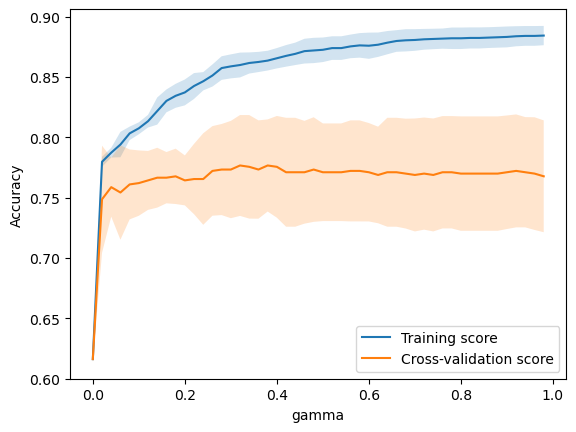

In [16]:
# Draw validation curve
# Define the parameter range C
param_range1 = np.arange(0, 2, 0.05)
# Define the parameter range gamma
param_range2 = np.arange(0, 1, 0.02)

# Calculate the training and validation scores for different numbers of trees
param_name="gamma"; param_range=param_range2
train_scores, val_scores = validation_curve(svm_model, X_tot, y_tot, param_name=param_name, param_range=param_range, cv=5)
print(train_scores.shape)
# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label="Training score")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, val_mean, label="Cross-validation score")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel(param_name)
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

**Neural network**

In [17]:
# Architecture NN
NN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = NN_model.fit(X, y, epochs=50, batch_size=32, validation_data=(X_val,y_val))


Epoch 1/50
23/23 [==============================] - 1s 13ms/step - loss: 0.7231 - accuracy: 0.6404 - val_loss: 0.6011 - val_accuracy: 0.6648
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.6938 - val_loss: 0.6056 - val_accuracy: 0.6816
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.6742 - val_loss: 0.6483 - val_accuracy: 0.6704
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.6882 - val_loss: 0.5758 - val_accuracy: 0.7095
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7289 - val_loss: 0.5483 - val_accuracy: 0.6872
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7416 - val_loss: 0.5328 - val_accuracy: 0.7374
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7612 - val_loss: 0.5283 - val_accuracy: 0.7486
Epoch 8/50
23/23 [=

In [18]:
# Evaluate on the validation set
NN_predictions = NN_model.predict(X_val)

val_survived = val_data["Survived"]
NN_predictions=NN_predictions.reshape(NN_predictions.shape[0])
NN_score_val = sum(val_survived==(NN_predictions>0.5))/len(val_survived)*100

print("The rate of good predictions on the validation set is {}%:", NN_score_val)

6/6 [==============================] - 0s 2ms/step
The rate of good predictions on the validation set is {}%: 77.6536312849162


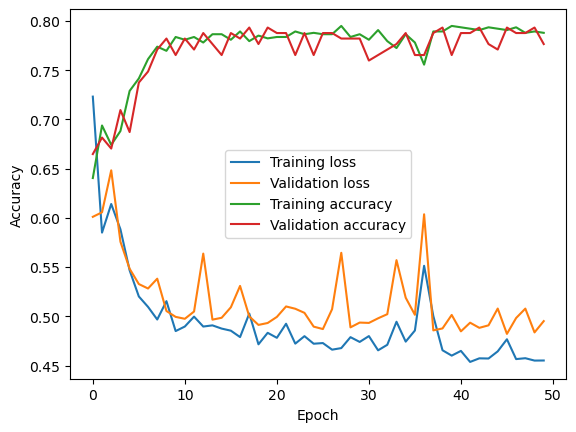

In [19]:
# Extract the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the learning curve for the training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the learning curve for the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

**Selection of the final model**

Once I have selected the best model among those tested (Random forest classifier with n_estimators=200 and max_depth=8), I retrain it with all the training datas (including the validation set). 

In [20]:
model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)
model.fit(X_tot, y_tot)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=1)

In [21]:
# Evaluate on the test set
X_test = pd.get_dummies(test_data[features])
# predictions = model.predict(X_test)

# Using 'Fare' as a feature for the Random Forest Classifier needs to take care of the NaN values
NotMissing_indices = np.isfinite(X_test['Fare'])
Missing_indices = np.isnan(X_test['Fare'])

X_test_NotMissing = X_test[NotMissing_indices]
y_test_NotMissing = model.predict(X_test_NotMissing)

# Replace NaN values with a placeholder value for prediction
X_test_Missing = np.nan_to_num(X_test[Missing_indices], nan=-9999)
y_test_Missing = model.predict(X_test_Missing)

predictions=np.insert(y_test_NotMissing,np.where(Missing_indices==1)[0][0],y_test_Missing)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
